<h1>Historical Data Extraction/Visualization Stock Data</h1>

Imad Uddin

<ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>


In [24]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [25]:
#Question 1: Extract Tesla Stock Data using yFinance.
Tesla = yf.Ticker("TSLA")
Tesla_data = Tesla.history(period="max")
Tesla_data.reset_index(inplace=True)
Tesla_data.tail()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3269,2023-06-26 00:00:00-04:00,250.070007,258.369995,240.699997,241.050003,179990600,0.0,0.0
3270,2023-06-27 00:00:00-04:00,243.240005,250.389999,240.850006,250.210007,164968200,0.0,0.0
3271,2023-06-28 00:00:00-04:00,249.699997,259.880005,248.889999,256.239990,159770800,0.0,0.0
3272,2023-06-29 00:00:00-04:00,258.029999,260.739990,253.610001,257.500000,131283400,0.0,0.0
3273,2023-06-30 00:00:00-04:00,260.600006,264.450012,259.890015,261.769989,112267600,0.0,0.0


In [26]:
#Question 2 Extract Tesla Revenue data using Web Scraping
import requests
from bs4 import BeautifulSoup

# Send a GET request to the website
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find the table with the historical stock data
table = soup.find("table", class_="historical_data_table")

# Extract the table rows
rows = table.find_all("tr")

# Extract the table headers
headers = [header.text for header in rows[0].find_all("th")]

# Initialize an empty list to store the stock data
stock_data = []

# Iterate over the remaining rows and extract the data
for row in rows[1:]:
    data = [cell.text for cell in row.find_all("td")]
    stock_data.append(data)

# Print the headers and stock data
print(headers)
for data in stock_data:
    print(data)


['Tesla Annual Revenue(Millions of US $)']
['2022', '$81,462']
['2021', '$53,823']
['2020', '$31,536']
['2019', '$24,578']
['2018', '$21,461']
['2017', '$11,759']
['2016', '$7,000']
['2015', '$4,046']
['2014', '$3,198']
['2013', '$2,013']
['2012', '$413']
['2011', '$204']
['2010', '$117']
['2009', '$112']


In [27]:
# Question 3: Use yfinance to Extract Stock Data
# Reset the index, save, and display the first five rows of the gme_data dataframe using the head function.

import yfinance as yf

# Define the ticker symbol for GME (GameStop)
ticker = "GME"

# Extract stock data using yfinance
GME_data = yf.download(ticker, start="2023-01-01", end="2023-06-30")

# Display the first five rows of the GME_data DataFrame
print(GME_data.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-03  18.639999  19.260000  17.090000  17.200001  17.200001  5135200
2023-01-04  17.250000  17.930000  16.900000  17.320000  17.320000  3939300
2023-01-05  17.059999  17.260000  15.890000  16.219999  16.219999  6066200
2023-01-06  16.000000  16.570000  15.410000  16.459999  16.459999  4823400
2023-01-09  16.650000  17.129999  16.360001  16.379999  16.379999  3522600


In [28]:
# Question 4: Use Webscraping to Extract GME Revenue Data
# Display the last five rows of the gme_revenue dataframe using the tail function
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", class_="historical_data_table")

rows = table.find_all("tr")

headers = [header.text for header in rows[0].find_all("th")]

revenue_data = []

for row in rows[1:]:
    data = [cell.text for cell in row.find_all("td")]
    revenue_data.append(data)

# Display the last rows
n = 5  # Number of last rows to display
last_rows = revenue_data[-n:]

print(headers)
for data in last_rows:
    print(data)



['GameStop Annual Revenue(Millions of US $)']
['2013', '$8,887']
['2012', '$9,551']
['2011', '$9,474']
['2010', '$9,078']
['2009', '$8,806']


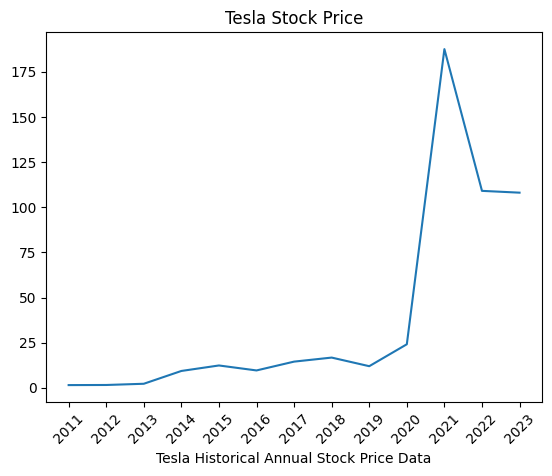

In [29]:
# Question 5: Plot Tesla Stock Graph
# Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/stock-price-history#:~:text=The%20Tesla%2052%2Dweek%20high,last%2052%20weeks%20is%20211.15."
response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", class_="historical_data_table")

rows = table.find_all("tr")

headers = [header.text for header in rows[0].find_all("th")]

stock_data = []

for row in rows[1:]:
    data = [cell.text for cell in row.find_all("td")]
    if len(data) >= 5:  # Check for at least 5 data points
        stock_data.append(data)

# Extract date and close price values
dates = [data[0] for data in stock_data]
close_prices = [float(data[4].replace(",", "")) if len(data) >= 5 else 0.0 for data in stock_data]

# Reverse the order of the lists
dates = dates[::-1]
close_prices = close_prices[::-1]

# Plot the inverted stock data
plt.plot(dates, close_prices)
plt.xlabel(headers[0])
plt.ylabel(headers[4] if len(headers) >= 5 else "")
plt.title("Tesla Stock Price")
plt.xticks(rotation=45)
plt.show()


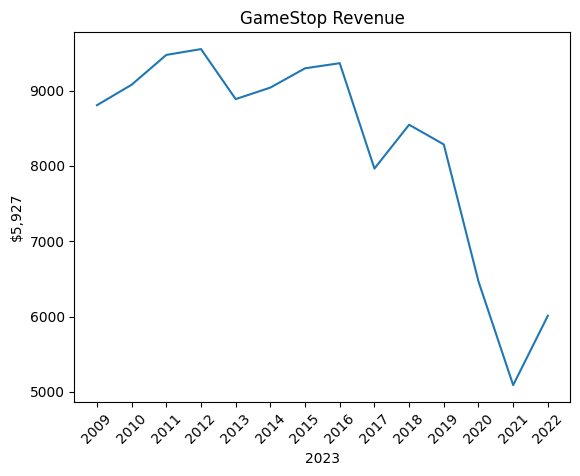

In [30]:
# Question 6: Plot GameStop Stock Graph
# Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", class_="historical_data_table")

rows = table.find_all("tr")

revenue_data = []

for row in rows:
    data = [cell.text.strip() for cell in row.find_all("td")]
    if len(data) > 0:
        revenue_data.append(data)

# Extract year and revenue values
headers = revenue_data[0]
revenue_data = revenue_data[1:]  # Exclude the header row

years = [data[0] for data in revenue_data]
revenues = [int(data[1].replace("$", "").replace(",", "")) for data in revenue_data]

# Reverse the order of the lists
years = years[::-1]
revenues = revenues[::-1]

# Plot the inverted revenue data
plt.plot(years, revenues)
plt.xlabel(headers[0])
plt.ylabel(headers[1])
plt.title("GameStop Revenue")
plt.xticks(rotation=45)
plt.show()
